### Disney Dataset Creation using BeautifulSoup

Using disney wikipedia pages : wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films

#### Get info box and store in a Dictionary

In [1]:
from bs4 import BeautifulSoup as bs
import requests

#### Load webpage

In [5]:
r = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")

# Convert to beautiful soup object
soup = bs(r.content)

# Print out the html
contents = soup.prettify()
print(contents)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Toy Story 3 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-fea

In [6]:
info_box = soup.find(class_="infobox vevent")
info_rows = info_box.find_all("tr")
for row in info_rows:
    print(row.prettify())


<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Toy Story 3
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3. The release date &quot;June 18&quot; is displayed on the bottom.">
   <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3. The release date &quot;June 18&quot; is displayed on the bottom." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
  </a>
  <div class="infobox-caption">
   Theatrical release poster
  </div>
 </td>
</tr>



In [7]:
movie_info = {}

def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip=True).replace('\xa0',' ') for li in row_data.find_all('li')]
    else:
        return row_data.get_text(" ", strip=True).replace('\xa0',' ')
    
for index, row in enumerate(info_rows):
    if index==0:
        movie_info['title'] = row.find('th').get_text()
    elif row.find('th'):
        key = row.find('th').get_text(" ",strip=True)
        val = get_content_value(row.find('td'))
        movie_info[key] = val
    
movie_info

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release dates': ['June 12, 2010 ( 2010-06-12 ) ( Taormina Film Fest )',
  'June 18, 2010 ( 2010-06-18 ) (United States)'],
 'Running time': '103 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million [1]',
 'Box office': '$1.067 billion [1]'}

Get infobox for all disney movies 

In [177]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")

# Convert to beautiful soup object
soup = bs(r.content)

# Print out the html
contents = soup.prettify()

In [178]:
movies = soup.select(".wikitable.sortable a")
movies_dict = {}

for r in movies:
    try:
        movies_dict[r['title']] = r['href']
    except:
        pass
    
movies_dict
# info_rows = movies.find("td")
# for row in info_rows:
#     print(row.prettify())

{'Snow White and the Seven Dwarfs (1937 film)': '/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 'RKO Pictures': '/wiki/RKO_Pictures',
 'Pinocchio (1940 film)': '/wiki/Pinocchio_(1940_film)',
 'Fantasia (1940 film)': '/wiki/Fantasia_(1940_film)',
 'The Reluctant Dragon (1941 film)': '/wiki/The_Reluctant_Dragon_(1941_film)',
 'Dumbo': '/wiki/Dumbo',
 'Bambi': '/wiki/Bambi#Computer-animated_remake',
 'Saludos Amigos': '/wiki/Saludos_Amigos',
 'Victory Through Air Power (film)': '/wiki/Victory_Through_Air_Power_(film)',
 'United Artists': '/wiki/United_Artists',
 'The Three Caballeros': '/wiki/The_Three_Caballeros',
 'Make Mine Music': '/wiki/Make_Mine_Music',
 'Song of the South': '/wiki/Song_of_the_South',
 'Fun and Fancy Free': '/wiki/Fun_and_Fancy_Free',
 'Melody Time': '/wiki/Melody_Time',
 'So Dear to My Heart': '/wiki/So_Dear_to_My_Heart',
 'The Adventures of Ichabod and Mr. Toad': '/wiki/The_Adventures_of_Ichabod_and_Mr._Toad',
 'Cinderella (1950 film)': '/wiki/Cinderella_(19

In [10]:
## First iteration through all movies, uncleaned data
movies_db = {}
missed = []
for title, link in movies_dict.items():
    movie_info = {}
    try:
        r = requests.get("https://en.wikipedia.org" + link)

        # Convert to beautiful soup object
        soup = bs(r.content)
        info_box = soup.find(class_="infobox vevent")
        info_rows = info_box.find_all("tr")

        def get_content_value(row_data):
            if row_data.find("li"):
                return [li.get_text(" ", strip=True).replace('\xa0',' ') for li in row_data.find_all('li')]
            else:
                return row_data.get_text(" ", strip=True).replace('\xa0',' ')

        for index, row in enumerate(info_rows):
            if index==0:
                movie_info['title'] = row.find('th').get_text()
            elif row.find('th'):
                key = row.find('th').get_text(" ",strip=True)
                val = get_content_value(row.find('td'))
                movie_info[key] = val
        movie_info['link'] = link
        movies_db[title] = movie_info
    except:
        missed.append(title)

movies_db


{'Snow White and the Seven Dwarfs (1937 film)': {'title': 'Snow White and the Seven Dwarfs',
  'Directed by': ['David Hand',
   'Perce Pearce',
   'William Cottrell',
   'Larry Morey',
   'Wilfred Jackson',
   'Ben Sharpsteen'],
  'Story by': ['Ted Sears',
   'Richard Creedon',
   'Otto Englander',
   'Dick Rickard',
   'Earl Hurd',
   'Merrill De Maris',
   'Dorothy Ann Blank',
   'Webb Smith'],
  'Based on': 'Snow White by the Brothers Grimm',
  'Produced by': 'Walt Disney',
  'Starring': ['Adriana Caselotti',
   'Roy Atwell',
   'Pinto Colvig',
   'Otis Harlan',
   'Scotty Mattraw',
   'Billy Gilbert',
   'Eddie Collins'],
  'Music by': ['Frank Churchill', 'Leigh Harline', 'Paul Smith'],
  'Production company': 'Walt Disney Productions',
  'Distributed by': 'RKO Radio Pictures',
  'Release dates': ['December 21, 1937 ( 1937-12-21 ) ( Carthay Circle Theatre )',
   'February 4, 1938 ( 1938-02-04 ) (United States)'],
  'Running time': '83 minutes',
  'Country': 'United States',
  'Lang

In [11]:
len(movies_db)

515

In [12]:
missed

['RKO Pictures',
 'United Artists',
 'Buena Vista Pictures Distribution',
 'Disney anthology television series',
 'Zorro (1957 TV series)',
 'Walt Disney',
 'Paramount Pictures',
 'King Features',
 'Buena Vista International',
 'Steven Lisberger',
 'Donald Kushner',
 'The Bryna Company',
 'Silver Screen Partners II',
 'Walt Disney Animation Studios',
 'Telefilm Canada',
 'Walt Disney Feature Animation',
 'Producers Sales Organization',
 'Silver Screen Partners III',
 'Burrowes Film Group',
 'Hoyts',
 'Silver Screen Partners IV',
 'Disney MovieToons',
 'Silver Screen Partners',
 'AB Svensk Filmindustri',
 'Touchstone Pictures',
 'Charles Gordon (producer)',
 'Touchwood Pacific Partners',
 'Jon Avnet',
 'Jordan Kerner',
 'Jim Henson Productions',
 'Amblin Entertainment',
 'David Kirschner',
 'Caravan Pictures',
 'Walt Disney Television Animation',
 'Hollywood Pictures',
 'Outlaw Productions',
 'James Orr (filmmaker)',
 'Interscope Communications',
 'PolyGram Filmed Entertainment',
 'Trim

### Save  data using JSON

In [21]:
import json

def save_jsondata(title, data):
    with open(title, 'w',encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False)
        
def load_jsondata(title):
    with open(title, encoding='utf-8') as f:
        return json.load(f)
            

In [97]:
save_jsondata('disney_movies_scrape.json',movies_db)

In [3]:
movies_db = load_jsondata('disney_movies_scrape.json')

In [4]:
# Pretty print the dictionary
print(json.dumps(movies_db, indent = 2)) 

{
  "Snow White and the Seven Dwarfs (1937 film)": {
    "title": "Snow White and the Seven Dwarfs",
    "Directed by": [
      "David Hand",
      "Perce Pearce",
      "William Cottrell",
      "Larry Morey",
      "Wilfred Jackson",
      "Ben Sharpsteen"
    ],
    "Story by": [
      "Ted Sears",
      "Richard Creedon",
      "Otto Englander",
      "Dick Rickard",
      "Earl Hurd",
      "Merrill De Maris",
      "Dorothy Ann Blank",
      "Webb Smith"
    ],
    "Based on": "Snow White by the Brothers Grimm",
    "Produced by": "Walt Disney",
    "Starring": [
      "Adriana Caselotti",
      "Roy Atwell",
      "Pinto Colvig",
      "Otis Harlan",
      "Scotty Mattraw",
      "Billy Gilbert",
      "Eddie Collins"
    ],
    "Music by": [
      "Frank Churchill",
      "Leigh Harline",
      "Paul Smith"
    ],
    "Production company": "Walt Disney Productions",
    "Distributed by": "RKO Radio Pictures",
    "Release dates": [
      "December 21, 1937 ( 1937-12-21 ) ( Cart

#### Data Cleaning
- ~~Clean up references [1]~~
- ~~Converting running time to an integer~
- ~~Convert dates into datetime object~~
- ~~Split up the long strings like story direction, story adaption etc..~~
- ~~Convert budget and box office to numbers~~

In [341]:
def get_movie_info(link):
    movie_info = {}

    r = requests.get("https://en.wikipedia.org/"+link)
    soup = bs(r.content)
    info_box = soup.find(class_="infobox vevent")
    info_rows = info_box.find_all("tr")

    def mins_to_int(running_time):
        print(running_time)
        if isinstance(running_time, list):
            return int(running_time[0].split()[0])
        if running_time == 'N/A':
            return None
        return int(running_time.split()[0])     

    def get_content_value(row_data,k):
        if row_data.find("li"):
            return [li.get_text(" ", strip=True).replace('\xa0',' ') for li in row_data.find_all('li')]
        elif row_data.find('br'):
            if k=='Release dates':
                print(k, [t.replace('\xa0',' ') for t in row_data.stripped_strings] )
            return [text.replace('\xa0',' ') for text in row_data.stripped_strings if len(text)>1 
                    and (text.find(':')==-1 or len(text.split(':')[1])>0)  and len(text.split('(')[0])>0]
            # remove any long strings separated by br tags and those having only commas or designations (art director:)
        else:
            return row_data.get_text(" ", strip=True).replace('\xa0',' ')

    def clean_tags(soup):       # remove [1], [2] from data
        for tag in soup.find_all(['sup','span']):    # superscript tags [1] and span objects like ( 2010-06-12 )  
            tag.decompose()
            
    def join_sentence(text):
        if isinstance(text,list):
            return ' '.join(text)
        if text == 'N/A':
            return None
        return text

    clean_tags(soup)
    for index, row in enumerate(info_rows):
        if index==0:
            movie_info['title'] = row.find('th').get_text(" ",strip=True)
        elif row.find('th'):
            key = row.find('th').get_text(" ",strip=True)     # remove \n or newlines and add separator as space
            val = get_content_value(row.find('td'),key)
            movie_info[key] = val
    movie_info['Based on (string)'] = join_sentence(movie_info.get('Based on','N/A'))
    movie_info['Running time (int)'] = mins_to_int(movie_info.get("Running time",'N/A'))
    movie_info['Budget (float)'] = money_to_int(movie_info.get("Budget", "N/A"))
    movie_info['Box office (float)'] = money_to_int(movie_info.get("Box office", "N/A"))
    rel_date = movie_info.get("Release date","N/A") if movie_info.get("Release date","N/A")!='N/A' else movie_info.get("Release dates","N/A")
    movie_info['Release date (datetime)'] = date_conversion(rel_date)
    return movie_info


In [66]:
import re

def word_to_value(word):
    value_dict = {'thousand':1000,'million':1000000,'billion':1000000000}
    return value_dict[word]

def money_to_int(val):
    amt = r'(million|billion|thousand)'
    numerical = r'\d+((,|\.)\d{1,3})*'
    if val == 'N/A':
        return None
    if isinstance(val, list):
        val = val[0]
    #money = re.search(rf'\${numerical}*(\sto\s|–|-{numerical})?\s{amt}?',val)
    money = re.search(rf'\${numerical}((\sto\s|–|-){numerical})?(\s{amt})?', val)

    if not money:
        return None
    money = money.group().replace(',','')
    money = money.lstrip('$')
    
    word = re.search(amt, money)
    if not word:
        return float(money)
    mul = word_to_value(word.group())
    number = re.search(rf'{numerical}',money).group()
    money = float(number)*mul
    return money
    

print(money_to_int('$157.8 million [1]'))
print(money_to_int('$250-260 million [3] [4]'))
print(money_to_int('$18 million [1] or $25 million '))
print(money_to_int('$1.663 billion [5]'))
print(money_to_int('<$106,759,044 (Total of 2 films)'))
print(money_to_int('<$18 to 20 million'))
print(money_to_int("$13 to 12.5 million"))

157800000.0
250000000.0
18000000.0
1663000000.0
106759044.0
18000000.0
13000000.0


In [346]:
from datetime import datetime

def date_conversion(date):
    fmt = ['%B %d, %Y ', '%d %B %Y ','%d %B %Y', '%Y','%Y ','%B %d, %Y','%B %Y','%B %Y ',': %B %d, %Y']
    if date == 'N/A' or not date:
        return None
    if isinstance(date, list):
        date = date[0]
    date = date.split('(')[0]
    date = date.split('–')[0]
    date = date.split('[')[0]
    
    for f in fmt:
        try:
            return(datetime.strptime(date,f).date())
        except:
            pass
    print("Couldn't match any format for",date)
        
date_conversion('November 25, 1987 ')
date_conversion(['June 6, 1986 ( 1986-06-06 ) (United States)'])
date_conversion('1987–1990')
date_conversion('23 December 2021')
date_conversion('June 1960')
date_conversion(': June 22, 1960')

datetime.date(1960, 6, 22)

In [244]:
[(movies.get('Release dates','Not there'),movies['Release date (datetime)']) for movies in movies_db.values() if not movies.get('Release date',0) ] 

[(['December 21, 1937 ( Carthay Circle Theatre )',
   'February 4, 1938 (United States)'],
  datetime.date(1937, 12, 21)),
 (['February 7, 1940 ( Center Theatre )', 'February 23, 1940 (United States)'],
  datetime.date(1940, 2, 7)),
 (['October 23, 1941 (New York City)', 'October 31, 1941 (U.S.)'],
  datetime.date(1941, 10, 23)),
 (['August 9, 1942 ( London )', 'August 21, 1942 (United States)'],
  datetime.date(1942, 8, 9)),
 (['August 24, 1942 (Rio de Janeiro)',
   'February 6, 1943 (Boston)',
   'February 19, 1943 (United States)'],
  datetime.date(1942, 8, 24)),
 (['December 21, 1944 (Mexico City)', 'February 3, 1945 (United States)'],
  datetime.date(1944, 12, 21)),
 (['April 20, 1946 (New York City)', 'August 15, 1946 (United States)'],
  datetime.date(1946, 4, 20)),
 (['November 12, 1946 (premiere)', 'November 20, 1946'],
  datetime.date(1946, 11, 12)),
 (['November 29, 1948 (Chicago)', 'January 19, 1949 (Indianapolis)'],
  datetime.date(1948, 11, 29)),
 (['February 15, 1950 (Bo

In [30]:
list(movies_db.values())[-10]

{'title': 'Crater',
 'Directed by': 'Kyle Patrick Alvarez',
 'Screenplay by': 'John Griffin',
 'Story by': ['John Griffin', 'Rpin Suwannath'],
 'Produced by': ['Dan Levine', 'Shawn Levy'],
 'Starring': ['Mckenna Grace', 'Isaiah Russell-Bailey', 'Kid Cudi'],
 'Cinematography': 'Jas Shelton',
 'Production companies': ['Walt Disney Pictures', '21 Laps Entertainment'],
 'Distributed by': 'Disney+',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$53.4 million',
 'link': '/wiki/Crater_(film)'}

In [354]:
## Apply the data cleaning steps
movies_db = {}
missed = []

from datetime import datetime
from bs4 import BeautifulSoup as bs
import re
import requests

def load_all_movies():
    r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")
    
    soup = bs(r.content) # Convert to beautiful soup object
    movies = soup.select(".wikitable.sortable a")
    movies_dict = {}

    for movie in movies:
        try:
            movies_dict[movie['title']] = movie['href']
        except:
            pass

    return movies_dict

def word_to_value(word):
    value_dict = {'thousand':1000,'million':1000000,'billion':1000000000}
    return value_dict[word]

def money_to_int(val):
    amt = r'(million|billion|thousand)'
    numerical = r'\d+((,|\.)\d{1,3})*'
    if val == 'N/A':
        return None
    if isinstance(val, list):
        val = val[0]
    #money = re.search(rf'\${numerical}*(\sto\s|–|-{numerical})?\s{amt}?',val)
    money = re.search(rf'\${numerical}((\sto\s|–|-){numerical})?(\s{amt})?', val)

    if not money:
        return None
    money = money.group().replace(',','')
    money = money.lstrip('$')
    
    word = re.search(amt, money)
    if not word:
        return float(money)
    mul = word_to_value(word.group())
    number = re.search(rf'{numerical}',money).group()
    money = float(number)*mul
    return money

def date_conversion(date):
    fmt = ['%B %d, %Y ', '%d %B %Y ','%d %B %Y', '%Y','%Y ','%B %d, %Y','%B %Y','%B %Y ',': %B %d, %Y']
    if date == 'N/A':
        return None
    if isinstance(date, list):
        date = date[0]
    date = date.split('(')[0]
    date = date.split('–')[0]
    date = date.split('[')[0]
    
    for f in fmt:
        try:
            return(datetime.strptime(date,f).date())
        except:
            pass
    print("Couldn't match any format for",date)

def get_content_value(row_data):
        if row_data.find("li"):
            return [li.get_text(" ", strip=True).replace('\xa0',' ') for li in row_data.find_all('li')]
        elif row_data.find('br'):
            return [text.replace('\xa0',' ') for text in row_data.stripped_strings if len(text)>1 
                    and (text.find(':')==-1 or len(text.split(':')[1])>0)  and len(text.split('(')[0])>0]
            # remove any long strings separated by br tags and those having only commas or designations (art director:)
        else:
            return row_data.get_text(" ", strip=True).replace('\xa0',' ')

def clean_tags(soup):       # remove [1], [2] from data
    for tag in soup.find_all(['sup','span']):    # superscript tags [1] and span objects like ( 2010-06-12 )  
        tag.decompose()
        
def join_sentence(text):
    if isinstance(text,list):
        return ' '.join(text)
    if text == 'N/A':
        return None
    return text

def mins_to_int(running_time):
    if isinstance(running_time, list):
        return int(running_time[0].split()[0])
    if running_time == 'N/A':
        return None
    return int(running_time.split()[0])        

movies_dict = load_all_movies()
for title, link in movies_dict.items():
    movie_info = {}
    try:
        r = requests.get("https://en.wikipedia.org" + link)

        # Convert to beautiful soup object
        soup = bs(r.content)
        info_box = soup.find(class_="infobox vevent")
        info_rows = info_box.find_all("tr")

        clean_tags(soup)
        for index, row in enumerate(info_rows):
            if index==0:
                movie_info['title'] = row.find('th').get_text(" ",strip=True)
            elif row.find('th'):
                key = row.find('th').get_text(" ",strip=True)     # remove \n or newlines and add separator as space
                val = get_content_value(row.find('td'))
                movie_info[key] = val
        
        # Cleaning existing fields and store to new columns
        movie_info['Running time (int)'] = mins_to_int(movie_info.get("Running time",'N/A'))
        movie_info['Budget (float)'] = money_to_int(movie_info.get("Budget", "N/A"))
        movie_info['Box office (float)'] = money_to_int(movie_info.get("Box office", "N/A"))
        rel_date = movie_info.get("Release date","N/A") if movie_info.get("Release date","N/A")!='N/A' else movie_info.get("Release dates","N/A")
        movie_info['Release date (datetime)'] = date_conversion(rel_date)
        movie_info['Based on (string)'] = join_sentence(movie_info.get('Based on','N/A'))
        movie_info['link'] = link
        movies_db[title] = movie_info
        
    except Exception as e:
        missed.append((title,e))

movies_db


{'Snow White and the Seven Dwarfs (1937 film)': {'title': 'Snow White and the Seven Dwarfs',
  'Directed by': ['David Hand',
   'Perce Pearce',
   'William Cottrell',
   'Larry Morey',
   'Wilfred Jackson',
   'Ben Sharpsteen'],
  'Story by': ['Ted Sears',
   'Richard Creedon',
   'Otto Englander',
   'Dick Rickard',
   'Earl Hurd',
   'Merrill De Maris',
   'Dorothy Ann Blank',
   'Webb Smith'],
  'Based on': ['Snow White', 'by the', 'Brothers Grimm'],
  'Produced by': 'Walt Disney',
  'Starring': ['Adriana Caselotti',
   'Roy Atwell',
   'Pinto Colvig',
   'Otis Harlan',
   'Scotty Mattraw',
   'Billy Gilbert',
   'Eddie Collins'],
  'Music by': ['Frank Churchill', 'Leigh Harline', 'Paul Smith'],
  'Production company': 'Walt Disney Productions',
  'Distributed by': 'RKO Radio Pictures',
  'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
   'February 4, 1938 (United States)'],
  'Running time': '83 minutes',
  'Country': 'United States',
  'Language': 'English',
  'B

#### Load pytest files to verify money to float conversion

In [98]:
#!python -m wget https://raw.githubusercontent.com/KeithGalli/disney-data-science-tasks/master/helper/test_money_conversion.py
#!python -m wget https://raw.githubusercontent.com/KeithGalli/disney-data-science-tasks/master/helper/conversion.py


Saved under conversion.py


In [86]:
!pytest helper/test_money_conversion.py

============================= test session starts =============================
platform win32 -- Python 3.9.13, pytest-7.1.2, pluggy-1.0.0
rootdir: C:\Users\windows\Documents
plugins: anyio-3.5.0
collected 15 items

helper\test_money_conversion.py ...............                          [100%]

============================= 15 passed in 0.05s ==============================


In [91]:
# import helper.conversion as m
# import importlib
# importlib.reload(m)

money_to_int("$99 million")

print(m.money_conversion("$99 million"))

### Save data using Pickle
Using pickle as JSON doesn't support datetime fields

In [3]:
import pickle
def save_data(title, data):
    with open(title, 'wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_data(title):
    with open(title,'rb') as f:
        return pickle.load(f)

In [366]:
save_data('disney_movies_cleaned.pickle',movies_db)

In [357]:
#mo_db = load_jsondata('disney_movies_scrape.json')
len(movies_db), len(mo_db)

(515, 515)

In [253]:
[m for m in mo_db.keys() if not movies_db.get(m,0)]

['The Vanishing Prairie',
 'Bedknobs and Broomsticks',
 'Unidentified Flying Oddball',
 'Never Cry Wolf (film)',
 'Tinker Bell (film series)']

In [365]:
movies_db['Snow White and the Seven Dwarfs (1937 film)']

{'title': 'Snow White and the Seven Dwarfs',
 'Directed by': ['David Hand',
  'Perce Pearce',
  'William Cottrell',
  'Larry Morey',
  'Wilfred Jackson',
  'Ben Sharpsteen'],
 'Story by': ['Ted Sears',
  'Richard Creedon',
  'Otto Englander',
  'Dick Rickard',
  'Earl Hurd',
  'Merrill De Maris',
  'Dorothy Ann Blank',
  'Webb Smith'],
 'Based on': ['Snow White', 'by the', 'Brothers Grimm'],
 'Produced by': 'Walt Disney',
 'Starring': ['Adriana Caselotti',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins'],
 'Music by': ['Frank Churchill', 'Leigh Harline', 'Paul Smith'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
  'February 4, 1938 (United States)'],
 'Running time': '83 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$1.5 million',
 'Box office': '$418 million',
 'Running time (int)': 83

In [353]:
get_movie_info('/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)')

#[(movies.get('Based on'), movies['title']) for movies in movies_db.values() if movies.get('Based on',0) and type(movies.get('Based on'))==str]

83 minutes


{'title': 'Snow White and the Seven Dwarfs',
 'Directed by': ['David Hand',
  'Perce Pearce',
  'William Cottrell',
  'Larry Morey',
  'Wilfred Jackson',
  'Ben Sharpsteen'],
 'Story by': ['Ted Sears',
  'Richard Creedon',
  'Otto Englander',
  'Dick Rickard',
  'Earl Hurd',
  'Merrill De Maris',
  'Dorothy Ann Blank',
  'Webb Smith'],
 'Based on': ['Snow White', 'by the', 'Brothers Grimm'],
 'Produced by': 'Walt Disney',
 'Starring': ['Adriana Caselotti',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins'],
 'Music by': ['Frank Churchill', 'Leigh Harline', 'Paul Smith'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
  'February 4, 1938 (United States)'],
 'Running time': '83 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$1.5 million',
 'Box office': '$418 million',
 'Based on (string)': 'Sn

In [367]:
movies_db['Tinker Bell (film)'] #['The Reluctant Dragon']

{'title': 'Tinker Bell',
 'Directed by': 'Bradley Raymond',
 'Written by': 'Jeffrey M. Howard',
 'Produced by': 'Jeannine Roussel',
 'Starring': ['Mae Whitman',
  'Kristin Chenoweth',
  'Raven-Symoné',
  'Lucy Liu',
  'America Ferrera'],
 'Narrated by': 'Loreena McKennitt',
 'Edited by': 'Mark W. Rosenbaum',
 'Music by': 'Joel McNeely',
 'Production companies': ['Walt Disney Pictures', 'DisneyToon Studios'],
 'Distributed by': 'Buena Vista Home Entertainment',
 'Release date': ['October 28, 2008'],
 'Running time': '78 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$50 million',
 'Box office': '$9.2 million',
 'Running time (int)': 78,
 'Budget (float)': 50000000.0,
 'Box office (float)': 9200000.0,
 'Release date (datetime)': datetime.date(2008, 10, 28),
 'Based on (string)': None,
 'link': '/wiki/Tinker_Bell_(film)'}

### Attach IMDB/ Rotten Tomatoes/ Metascore Ratings

In [2]:
import requests
import urllib

def get_omdb_info(title):
    base_url = 'http://www.omdbapi.com/?'
    parameters = {'apikey': 'b04b3dd8', 't':title}
    params_encoded = urllib.parse.urlencode(parameters)
    full_url = base_url + params_encoded
    #print(full_url)
    return requests.get(full_url).json()

#get_omdb_info('Tinker Bell')

def get_rotten_tomato_score(omdb_info):
    #omdb_info = get_omdb_info(title)
    ratings = omdb_info.get('Ratings',[])
    for rating in ratings:
        if rating['Source'] == 'Rotten Tomatoes':
            return rating['Value']
    return None
 
#get_rotten_tomato_score(get_omdb_info('Tinker Bell'))

In [391]:
for k,v in movies_db.items():
    dic = v.copy()
    omdb_info = get_omdb_info(dic['title'])
    dic['imdb'] = omdb_info.get('imdbRating',None)
    dic['metascore'] = omdb_info.get('Metascore',None)
    dic['rotten_tomatoes'] = get_rotten_tomato_score(omdb_info)
    movies_db[k] = dic

http://www.omdbapi.com/?apikey=b04b3dd8&t=Snow+White+and+the+Seven+Dwarfs
http://www.omdbapi.com/?apikey=b04b3dd8&t=Pinocchio
http://www.omdbapi.com/?apikey=b04b3dd8&t=Fantasia
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Reluctant+Dragon
http://www.omdbapi.com/?apikey=b04b3dd8&t=Dumbo
http://www.omdbapi.com/?apikey=b04b3dd8&t=Bambi
http://www.omdbapi.com/?apikey=b04b3dd8&t=Saludos+Amigos
http://www.omdbapi.com/?apikey=b04b3dd8&t=Victory+Through+Air+Power
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Three+Caballeros
http://www.omdbapi.com/?apikey=b04b3dd8&t=Make+Mine+Music
http://www.omdbapi.com/?apikey=b04b3dd8&t=Song+of+the+South
http://www.omdbapi.com/?apikey=b04b3dd8&t=Fun+and+Fancy+Free
http://www.omdbapi.com/?apikey=b04b3dd8&t=Melody+Time
http://www.omdbapi.com/?apikey=b04b3dd8&t=So+Dear+to+My+Heart
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Adventures+of+Ichabod+and+Mr.+Toad
http://www.omdbapi.com/?apikey=b04b3dd8&t=Cinderella
http://www.omdbapi.com/?apikey=b04b3dd8&t=Treas

http://www.omdbapi.com/?apikey=b04b3dd8&t=Escape+from+the+Dark
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Many+Adventures+of
http://www.omdbapi.com/?apikey=b04b3dd8&t=A+Tale+of+Two+Critters
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Rescuers
http://www.omdbapi.com/?apikey=b04b3dd8&t=Herbie+Goes+to+Monte+Carlo
http://www.omdbapi.com/?apikey=b04b3dd8&t=Pete%27s+Dragon
http://www.omdbapi.com/?apikey=b04b3dd8&t=Candleshoe
http://www.omdbapi.com/?apikey=b04b3dd8&t=Return+from+Witch+Mountain
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Cat+from+Outer+Space
http://www.omdbapi.com/?apikey=b04b3dd8&t=Hot+Lead+and+Cold+Feet
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+North+Avenue+Irregulars
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Apple+Dumpling+Gang+Rides+Again
http://www.omdbapi.com/?apikey=b04b3dd8&t=Unidentified+Flying+Oddball
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Black+Hole
http://www.omdbapi.com/?apikey=b04b3dd8&t=Midnight+Madness
http://www.omdbapi.com/?apikey=b04b3d

http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Emperor%27s+New+Groove
http://www.omdbapi.com/?apikey=b04b3dd8&t=Recess%3A+School%27s+Out
http://www.omdbapi.com/?apikey=b04b3dd8&t=Lady+and+the+Tramp+II%3A
http://www.omdbapi.com/?apikey=b04b3dd8&t=Atlantis%3A+The+Lost+Empire
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Princess+Diaries
http://www.omdbapi.com/?apikey=b04b3dd8&t=Max+Keeble%27s+Big+Move
http://www.omdbapi.com/?apikey=b04b3dd8&t=Monsters%2C+Inc.
http://www.omdbapi.com/?apikey=b04b3dd8&t=Academy+Award+for+Best+Animated+Feature
http://www.omdbapi.com/?apikey=b04b3dd8&t=Mickey%27s+Magical+Christmas%3A+Snowed+in+at+the+House+of+Mouse
http://www.omdbapi.com/?apikey=b04b3dd8&t=Snow+Dogs
http://www.omdbapi.com/?apikey=b04b3dd8&t=Return+to+Never+Land
http://www.omdbapi.com/?apikey=b04b3dd8&t=Cinderella+II%3A+Dreams+Come+True
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Hunchback+of+Notre+Dame+II
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Rookie
http://www.omdbapi.com/?apikey=b04

http://www.omdbapi.com/?apikey=b04b3dd8&t=Tangled
http://www.omdbapi.com/?apikey=b04b3dd8&t=Tron%3A+Legacy
http://www.omdbapi.com/?apikey=b04b3dd8&t=Once+Upon+a+Warrior
http://www.omdbapi.com/?apikey=b04b3dd8&t=Beverly+Hills+Chihuahua+2
http://www.omdbapi.com/?apikey=b04b3dd8&t=Lilly+the+Witch%3A+The+Journey+to+Mandolan
http://www.omdbapi.com/?apikey=b04b3dd8&t=Mars+Needs+Moms
http://www.omdbapi.com/?apikey=b04b3dd8&t=Zokkomon
http://www.omdbapi.com/?apikey=b04b3dd8&t=Prom
http://www.omdbapi.com/?apikey=b04b3dd8&t=Pirates+of+the+Caribbean%3A+On+Stranger+Tides
http://www.omdbapi.com/?apikey=b04b3dd8&t=Cars+2
http://www.omdbapi.com/?apikey=b04b3dd8&t=Winnie+the+Pooh
http://www.omdbapi.com/?apikey=b04b3dd8&t=Spooky+Buddies
http://www.omdbapi.com/?apikey=b04b3dd8&t=The+Muppets
http://www.omdbapi.com/?apikey=b04b3dd8&t=Treasure+Buddies
http://www.omdbapi.com/?apikey=b04b3dd8&t=John+Carter
http://www.omdbapi.com/?apikey=b04b3dd8&t=Arjun%3A+The+Warrior+Prince
http://www.omdbapi.com/?apikey=b0

In [93]:
def scores_to_int(movies_dict):
    updated_dict = movies_dict.copy()
    for k,v in updated_dict.items():
        new_dict = v.copy()
        new_dict['imdb'] = float(new_dict['imdb']) if new_dict['imdb'] and new_dict['imdb']!='N/A' else None
        new_dict['metascore'] = int(new_dict['metascore']) if new_dict['metascore'] and new_dict['metascore']!='N/A' else None
        new_dict['rotten_tomatoes'] = int(new_dict['rotten_tomatoes'].rstrip('%')) if new_dict['rotten_tomatoes'] and new_dict['rotten_tomatoes']!='N/A' else None
        updated_dict[k] = new_dict
    return updated_dict

{'Snow White and the Seven Dwarfs (1937 film)': {'title': 'Snow White and the Seven Dwarfs',
  'Directed by': ['David Hand',
   'Perce Pearce',
   'William Cottrell',
   'Larry Morey',
   'Wilfred Jackson',
   'Ben Sharpsteen'],
  'Story by': ['Ted Sears',
   'Richard Creedon',
   'Otto Englander',
   'Dick Rickard',
   'Earl Hurd',
   'Merrill De Maris',
   'Dorothy Ann Blank',
   'Webb Smith'],
  'Based on': ['Snow White', 'by the', 'Brothers Grimm'],
  'Produced by': 'Walt Disney',
  'Starring': ['Adriana Caselotti',
   'Roy Atwell',
   'Pinto Colvig',
   'Otis Harlan',
   'Scotty Mattraw',
   'Billy Gilbert',
   'Eddie Collins'],
  'Music by': ['Frank Churchill', 'Leigh Harline', 'Paul Smith'],
  'Production company': 'Walt Disney Productions',
  'Distributed by': 'RKO Radio Pictures',
  'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
   'February 4, 1938 (United States)'],
  'Running time': '83 minutes',
  'Country': 'United States',
  'Language': 'English',
  'B

In [95]:
movies_db = scores_to_int(movies_db)
save_data('disney_movies_with_scores.pickle',movies_db)

In [92]:
movies_db = load_data('disney_movies_with_scores.pickle')

#### Convert datetime object to String to store as JSON/CSV

In [96]:
movies_copy = {k:v.copy() for k,v in movies_db.items()}

In [97]:
for k,v in movies_copy.items():
    current_date = v['Release date (datetime)']
    if current_date:
        v['Release date (datetime)'] = current_date.strftime('%B %d, %Y')

In [98]:
save_jsondata('disney_data_final.json',movies_copy)

In [23]:
import pandas as pd

In [99]:
df = pd.DataFrame(movies_db).T

In [100]:
df.to_csv('disneymovies_data_final.csv',index=True)

In [101]:
d2 = pd.read_csv('disneymovies_data_final.csv',index_col=0)

In [102]:
d2.head(3)

title  \
Snow White and the Seven Dwarfs (1937 film)  Snow White and the Seven Dwarfs   
Pinocchio (1940 film)                                              Pinocchio   
Fantasia (1940 film)                                                Fantasia   

                                                                                   Directed by  \
Snow White and the Seven Dwarfs (1937 film)  ['David Hand', 'Perce Pearce', 'William Cottre...   
Pinocchio (1940 film)                        ['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...   
Fantasia (1940 film)                         ['Samuel Armstrong', 'James Algar', 'Bill Robe...   

                                                                                      Story by  \
Snow White and the Seven Dwarfs (1937 film)  ['Ted Sears', 'Richard Creedon', 'Otto England...   
Pinocchio (1940 film)                        ['Ted Sears', 'Otto Englander', 'Webb Smith', ...   
Fantasia (1940 film)                                              ['Joe Grant', 'Dick Huemer']   

                                                                                      Based on  \
Snow White and the Seven Dwarfs (1937 film)         ['Snow White', 'by the', 'Brothers Grimm']   
Pinocchio (1940 film)                        ['The Adventures of Pinocchio', 'by', 'Carlo C...   
Fantasia (1940 film)                                                                       NaN   

                                                                   Produced by  \
Snow White and the Seven Dwarfs (1937 film)                        Walt Disney   
Pinocchio (1940 film)                                              Walt Disney   
Fantasia (1940 film)                         ['Walt Disney', 'Ben Sharpsteen']   

                                                                                      Starring  \
Snow White and the Seven Dwarfs (1937 film)  ['Adriana Caselotti', 'Roy Atwell', 'Pinto Col...   
Pinocchio (1940 film)                        ['Cliff Edwards', 'Dickie Jones', 'Christian R...   
Fantasia (1940 film)                                     ['Leopold Stokowski', 'Deems Taylor']   

                                                                                      Music by  \
Snow White and the Seven Dwarfs (1937 film)  ['Frank Churchill', 'Leigh Harline', 'Paul Smi...   
Pinocchio (1940 film)                                       ['Leigh Harline', 'Paul J. Smith']   
Fantasia (1940 film)                                                               See program   

                                                  Production company  \
Snow White and the Seven Dwarfs (1937 film)  Walt Disney Productions   
Pinocchio (1940 film)                        Walt Disney Productions   
Fantasia (1940 film)                         Walt Disney Productions   

                                                 Distributed by  \
Snow White and the Seven Dwarfs (1937 film)  RKO Radio Pictures   
Pinocchio (1940 film)                        RKO Radio Pictures   
Fantasia (1940 film)                         RKO Radio Pictures   

                                                                                 Release dates  \
Snow White and the Seven Dwarfs (1937 film)  ['December 21, 1937 ( Carthay Circle Theatre )...   
Pinocchio (1940 film)                        ['February 7, 1940 ( Center Theatre )', 'Febru...   
Fantasia (1940 film)                                                                       NaN   

                                             ... Traditional Chinese  \
Snow White and the Seven Dwarfs (1937 film)  ...                 NaN   
Pinocchio (1940 film)                        ...                 NaN   
Fantasia (1940 film)                         ...                 NaN   

                                            Simplified Chinese Original title  \
Snow White and the Seven Dwarfs (1937 film)                NaN            NaN   
Pinocchio (1940 film)                                 

In [103]:
# Get back dictionary from the DataFrame
d = d2.to_dict("split")
d = dict(zip(d["index"], d["data"]))
d

{'Snow White and the Seven Dwarfs (1937 film)': ['Snow White and the Seven Dwarfs',
  "['David Hand', 'Perce Pearce', 'William Cottrell', 'Larry Morey', 'Wilfred Jackson', 'Ben Sharpsteen']",
  "['Ted Sears', 'Richard Creedon', 'Otto Englander', 'Dick Rickard', 'Earl Hurd', 'Merrill De Maris', 'Dorothy Ann Blank', 'Webb Smith']",
  "['Snow White', 'by the', 'Brothers Grimm']",
  'Walt Disney',
  "['Adriana Caselotti', 'Roy Atwell', 'Pinto Colvig', 'Otis Harlan', 'Scotty Mattraw', 'Billy Gilbert', 'Eddie Collins']",
  "['Frank Churchill', 'Leigh Harline', 'Paul Smith']",
  'Walt Disney Productions',
  'RKO Radio Pictures',
  "['December 21, 1937 ( Carthay Circle Theatre )', 'February 4, 1938 (United States)']",
  '83 minutes',
  'United States',
  'English',
  '$1.5 million',
  '$418 million',
  83.0,
  1500000.0,
  418000000.0,
  '1937-12-21',
  'Snow White by the Brothers Grimm',
  '/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)',
  7.6,
  96.0,
  nan,
  nan,
  nan,
  nan,
  nan,
 

### Data Analysis

In [104]:
running_times = df.sort_values(['Running time (int)'])
running_times[['title','Running time (int)','imdb','rotten_tomatoes','metascore']]

title  \
Sacred Planet                                          Sacred Planet   
Roving Mars                                              Roving Mars   
Saludos Amigos                                        Saludos Amigos   
A Tale of Two Critters                        A Tale of Two Critters   
The Young Black Stallion                    The Young Black Stallion   
...                                                              ...   
Crater (film)                                                 Crater   
Young Woman and the Sea                      Young Woman and the Sea   
Father of the Bride (franchise)                  Father of the Bride   
Once on This Island                                                    
The 25th Annual Putnam County Spelling Bee                             

                                           Running time (int)  imdb  \
Sacred Planet                                              40   6.0   
Roving Mars                                                40   7.2   
Saludos Amigos                                             42   6.1   
A Tale of Two Critters                                     48   5.9   
The Young Black Stallion                                   50   5.4   
...                                                       ...   ...   
Crater (film)                                            None   5.7   
Young Woman and the Sea                                  None  None   
Father of the Bride (franchise)                          None   6.5   
Once on This Island                                      None  None   
The 25th Annual Putnam County Spelling Bee               None  None   

                                           rotten_tomatoes metascore  
Sacred Planet                                           58        53  
Roving Mars                                             71        58  
Saludos Amigos                                          80        60  
A Tale of Two Critters                                None      None  
The Young Black Stallion                                44        51  
...                                                    ...       ...  
Crater (film)                                         None      None  
Young Woman and the Sea                               None      None  
Father of the Bride (franchise)                         70        51  
Once on This Island                                   None      None  
The 25th Annual Putnam County Spelling Bee            None      None  

[515 rows x 5 columns]

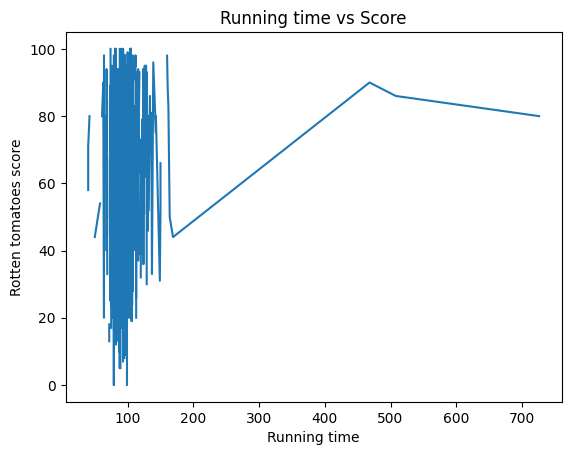

In [112]:
import matplotlib.pyplot as plt

plt.plot( running_times['Running time (int)'], running_times['rotten_tomatoes'])
plt.xlabel('Running time')
plt.ylabel('Rotten tomatoes score')
plt.title('Running time vs Score')
plt.show();

In [206]:
# Best movies of all time

def scoring(row):
    imdb, rt, meta = row.get('imdb'), row.get('rotten_tomatoes'),row.get('metascore')
    c = 0
    score = 0
    if imdb:
        c+=1
        score+=(imdb*10)
    if rt:
        c+=1
        score+=rt
    if meta:
        c+=1
        score+=meta
    return round(score/c,2) if c else 0

ratings = df.loc[:,]
score_cols = ['imdb','rotten_tomatoes','metascore']
ratings['avg_score'] = ratings[score_cols].apply(scoring,axis=1)

In [212]:
ratings[score_cols+['avg_score']].dropna().sort_values('avg_score',ascending=False)

imdb rotten_tomatoes metascore  \
Toy Story                                  8.3             100        96   
Pinocchio (1940 film)                      7.5             100        99   
WALL-E                                     8.4              95        95   
Inside Out 2                               8.2              98        94   
Inside Out (2015 film)                     8.2              98        94   
...                                        ...             ...       ...   
A Kid in King Arthur's Court               4.7               5        34   
Jonas Brothers: The 3D Concert Experience  1.6              23        45   
Artemis Fowl (film)                        4.2               8        31   
Old Dogs (film)                            5.3               5        19   
Mr. Magoo (film)                           4.0              10        18   

                                           avg_score  
Toy Story                                      93.00  
Pinocchio (1940 film)                          91.33  
WALL-E                                         91.33  
Inside Out 2                                   91.33  
Inside Out (2015 film)                         91.33  
...                                              ...  
A Kid in King Arthur's Court                   28.67  
Jonas Brothers: The 3D Concert Experience      28.00  
Artemis Fowl (film)                            27.00  
Old Dogs (film)                                25.67  
Mr. Magoo (film)                               22.67  

[293 rows x 4 columns]